In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from scipy import stats

Context
Melbourne real estate is BOOMING. Can you find the insight or predict the next big trend to become a real estate mogul… or even harder, to snap up a reasonably priced 2-bedroom unit?

Content
This is a snapshot of a dataset created by Tony Pino.

It was scraped from publicly available results posted every week from Domain.com.au. He cleaned it well, and now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

Notes on Specific Variables
Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area

Acknowledgements
This is intended as a static (unchanging) snapshot of https://www.kaggle.com/anthonypino/melbourne-housing-market. It was created in September 2017. Additionally, homes with no Price have been removed.

In [2]:
df = pd.read_csv('melb_data.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# NOMOR 1

In [4]:
# Central Tendencies

kolom = ['Landsize', 'Distance', 'Price']

for i in kolom:
    print(f'mean kolom {i} =', st.mean(df[i]))
    print(f'mode kolom {i} =', st.mode(df[i]))
    print(f'median kolom {i} =', st.median(df[i]))
    print(f'harmonic_mean kolom {i} =', st.harmonic_mean(df[i]))
    print(f'median_low kolom {i} =', st.median_low(df[i]))
    print(f'median_high kolom {i} =', st.median_high(df[i]))
    print('\n')

mean kolom Landsize = 558.4161266568483
mode kolom Landsize = 0.0
median kolom Landsize = 440.0
harmonic_mean kolom Landsize = 0
median_low kolom Landsize = 440.0
median_high kolom Landsize = 440.0


mean kolom Distance = 10.13777614138439
mode kolom Distance = 11.2
median kolom Distance = 9.2
harmonic_mean kolom Distance = 0
median_low kolom Distance = 9.2
median_high kolom Distance = 9.2


mean kolom Price = 1075684.079455081
mode kolom Price = 1100000.0
median kolom Price = 903000.0
harmonic_mean kolom Price = 814978.981670345
median_low kolom Price = 903000.0
median_high kolom Price = 903000.0




'Central Tendencies characterizes one central value for the entire distribution' artinya suatu data bisa direpresentasikan menjadi suatu nilai. Nilai-nilai tersebut terdiri dari rata-rata(mean), modus(mode), dan median(median). Informasi ini sangat penting ketika kita melakukan cleaning data dimana kita harus meng-impute missing value dari suatu data. Mean biasanya digunakan apabila datanya tidak terdapat outlier, median digunakan bila data terdapat outlier, dan modus biasanya digunakan untuk kategorikal data.

In [5]:
# Dispersion
kolom = ['Landsize', 'Distance', 'Price']
for i in kolom:
    print(f'variance kolom {i} =', st.variance(df[i]))
    print(f'pvariance kolom {i} =', st.pvariance(df[i]))
    print(f'stdev kolom {i} =', st.stdev(df[i]))
    print(f'pstdev kolom {i} =', st.pstdev(df[i]))
    print('\n')

variance kolom Landsize = 15925440.991933739
pvariance kolom Landsize = 15924268.279047733
stdev kolom Landsize = 3990.669241109032
pstdev kolom Landsize = 3990.5223065468176


variance kolom Distance = 34.44193245743205
pvariance kolom Distance = 34.4393962326561
stdev kolom Distance = 5.868724943071711
pstdev kolom Distance = 5.868508859382944


variance kolom Price = 408718202199.8992
pvariance kolom Price = 408688105130.51776
stdev kolom Price = 639310.724296018
pstdev kolom Price = 639287.1851762069




Dispersion merupakan suatu nilai untuk mengetahui variasi dan persebaran data. Apabila nilai variasi dan standard deviasi semakin besar berarti range persebaran datanya semakin jauh dan akan semakin variatif datanya, begitupun sebaliknya

In [6]:
# Distribution

# Normal Test
alpha = 1e-3
kolom = ['Landsize', 'Distance', 'Price']
for i in kolom:
    n, p = stats.normaltest(df[i])
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(f'kolom {i} tidak terdistribusi normal')
    else:
        print(f'kolom {i} terdistribusi normal')

print('\n')

# Skewness Test
for i in kolom:
    n, p = stats.skewtest(df[i])
    if -0.5 < n < 0.5:
        print(f'the distribution of {i} is approximately symmetric')
    elif -1 < n < -0.5 or 0.5 > n > 1:
        print(f'the distribution of {i} is moderately skewed.')
    elif n < -1 or n > 1:
        print(f'the distribution of {i} is highly skewed.')

print('\n')

# Kurtosis Test
for i in kolom:
    n, p = stats.kurtosistest(df[i])
    if n > 3:
        print(f'kurva distribusi {i} adalah leptokurtik')
    elif n < 3:
        print(f'kurva distribusi {i} adalah platikurtik')
    elif n == 3:
        print(f'kurva distribusi {i} bermakna normal atau mesokurtik atau mesokurtotik')

kolom Landsize tidak terdistribusi normal
kolom Distance tidak terdistribusi normal
kolom Price tidak terdistribusi normal


the distribution of Landsize is highly skewed.
the distribution of Distance is highly skewed.
the distribution of Price is highly skewed.


kurva distribusi Landsize adalah leptokurtik
kurva distribusi Distance adalah leptokurtik
kurva distribusi Price adalah leptokurtik


Dari distribusi diatas bisa diketahui bahwa data pada kolom ['Landsize', 'Distance', 'Price'] tidak terdistribusi secara normal. Dari central tendencies :

- 1. kolom ['Landsize'] memiliki nilai mean > median sehingga cenderung positive skewness dan dikategorikan 'highly skewed' dan kurtosisnya lebih lancip keatas (>3) dikategorikan 'leptokurtik'
- 2. kolom ['Distance '] memiliki nilai mean > median sehingga cenderung positive skewness dan dikategorikan 'highly skewed' dan kurtosisnya lebih lancip keatas (>3) dikategorikan 'leptokurtik'
- 3. kolom ['Price'] memiliki nilai mean > median sehingga cenderung positive skewness dan dikategorikan 'highly skewed' dan kurtosisnya lebih lancip keatas (>3) dikategorikan 'leptokurtik'

# NOMOR 2

In [7]:
kolom2 = ['Landsize', 'Distance']

# CARA 1 dengan rumus IQR
# Outlier IQR function
def find_outlier(x):
    q1 = df.describe().loc['25%', x]
    q3 = df.describe().loc['75%', x]
    iqr = abs(q1 - q3)
    bottom_threshold = q1 - (iqr * 1.5)
    top_threshold = q3 + (iqr * 1.5)

    outlier = [i for i in df[x] if i < bottom_threshold or i > top_threshold ]
    return outlier


outlier_landsize = find_outlier('Landsize')
outlier_distance = find_outlier('Distance')

print('outlier_landsize =', (outlier_landsize), '\n')
print('total outlier_landsize', len(outlier_landsize), '\n')
print('outlier_distance =', (outlier_distance), '\n')
print('total outlier_distance', len(outlier_distance), '\n')

outlier_landsize = [4290.0, 1581.0, 2113.0, 1491.0, 2471.0, 1957.0, 1472.0, 1801.0, 2051.0, 1468.0, 1437.0, 1611.0, 1364.0, 75100.0, 4931.0, 1572.0, 1561.0, 4668.0, 4676.0, 2120.0, 1393.0, 2886.0, 15900.0, 2773.0, 3701.0, 1777.0, 1484.0, 1764.0, 1966.0, 2381.0, 2925.0, 1622.0, 1547.0, 10100.0, 1658.0, 2782.0, 4332.0, 2778.0, 4296.0, 4296.0, 4296.0, 2077.0, 2794.0, 8680.0, 1783.0, 1485.0, 3056.0, 1996.0, 1402.0, 1504.0, 3414.0, 1585.0, 1997.0, 3132.0, 1568.0, 3194.0, 3977.0, 4267.0, 4440.0, 3448.0, 3957.0, 2136.0, 1972.0, 15100.0, 5661.0, 3967.0, 1396.0, 37000.0, 4977.0, 3014.0, 3014.0, 4230.0, 1414.0, 4051.0, 1751.0, 1388.0, 2026.0, 2187.0, 1981.0, 1660.0, 2522.0, 1588.0, 2300.0, 1882.0, 1390.0, 2469.0, 2427.0, 2488.0, 2431.0, 2401.0, 2193.0, 21700.0, 2166.0, 2166.0, 2166.0, 6866.0, 5042.0, 1768.0, 1958.0, 8216.0, 3037.0, 1485.0, 4679.0, 41400.0, 8223.0, 1725.0, 2571.0, 2740.0, 7455.0, 8223.0, 3516.0, 1850.0, 1613.0, 2325.0, 2143.0, 14500.0, 17200.0, 1369.0, 1424.0, 2122.0, 6111.0, 172

In [8]:
# CARA 2 dengan Z-score

# Outlier z-score
z_score_landsize = np.abs(stats.zscore(df['Landsize']))
z_score_distance = np.abs(stats.zscore(df['Distance']))


# Threshold = 3 (Asumsi dari Teori Mas Kim)
outlier_index_landsize = np.where(z_score_landsize >= 3)[0].tolist()
outlier_index_distance = np.where(z_score_distance >= 3)[0].tolist()


data_outlier_landsize = [df['Landsize'][i] for i in outlier_index_landsize]
data_outlier_distance = [df['Distance'][i] for i in outlier_index_distance]


print('data_outlier_landsize =', data_outlier_landsize)
print('TOTAL =', len(data_outlier_landsize), '\n')
print('data_outlier_distance =', data_outlier_distance)
print('TOTAL =', len(data_outlier_distance), '\n')


data_outlier_landsize = [75100.0, 15900.0, 15100.0, 37000.0, 21700.0, 41400.0, 14500.0, 17200.0, 17200.0, 15900.0, 21715.0, 17200.0, 37000.0, 38490.0, 14196.0, 76000.0, 17200.0, 433014.0, 40468.0, 16000.0, 17200.0, 20200.0, 14294.0, 44500.0]
TOTAL = 24 

data_outlier_distance = [35.2, 34.7, 38.0, 36.9, 38.0, 45.9, 32.3, 45.2, 31.7, 31.7, 34.1, 34.1, 35.4, 34.7, 31.7, 31.7, 31.7, 31.2, 31.2, 31.2, 31.2, 28.8, 38.0, 36.9, 32.3, 31.7, 29.8, 31.7, 35.4, 31.7, 31.7, 35.2, 34.9, 34.9, 45.9, 32.3, 41.0, 31.7, 29.8, 35.4, 34.7, 31.7, 39.8, 35.2, 31.2, 38.0, 38.0, 38.0, 38.0, 31.7, 29.8, 29.8, 31.6, 34.1, 47.3, 47.4, 34.7, 35.4, 34.6, 31.7, 35.2, 35.2, 34.9, 38.0, 38.0, 38.0, 38.0, 33.3, 31.7, 29.8, 31.7, 35.4, 34.6, 31.7, 29.3, 37.5, 35.2, 35.2, 34.9, 34.7, 38.0, 38.0, 32.3, 33.3, 33.3, 31.7, 31.7, 29.8, 28.8, 35.4, 31.7, 31.7, 31.7, 35.2, 45.9, 31.2, 34.9, 34.7, 38.0, 38.0, 45.9, 31.7, 41.0, 31.7, 34.1, 31.2, 34.9, 28.8, 28.5, 38.0, 38.0, 45.9, 45.9, 29.8, 29.8, 29.8, 34.1, 34.1, 43.3, 47.3, 

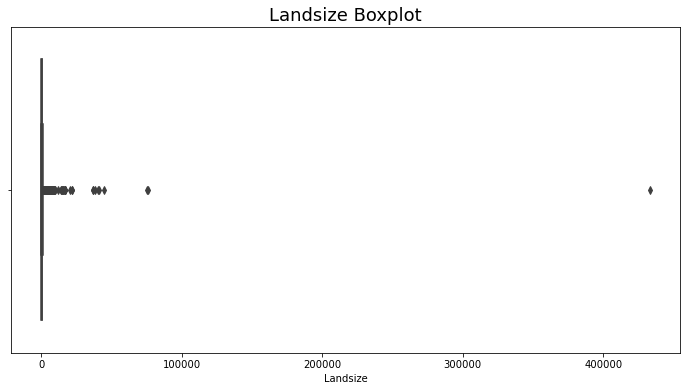

In [9]:
# MENAMPILKAN BOXPLOT, SEHINGGA OUTLIER AKAN DIIDENTIFIED DENGAN RUMUS IQR

plt.figure(figsize=(12,6))
sns.boxplot('Landsize', data=df)
plt.title('Landsize Boxplot', fontsize=18)
plt.show()

Dari boxplot diatas, outlier dapat dilihat dengan titik-titik diluar box. Terlihat bahwa outlier atas lebih banyak disini dan tidak ada outlier bawah. Jumlah outlier mungkin tidak sama dengan jumlah titik karena range dari boxplot yang sangat jauh sehingga ada overlapping dan tidak terlihat di boxplot. Untuk informasi median, 75%quartile, dan 25%quartile juga tidak terlihat karena boxnya nyaris berhimpitan. Perlu penanganan lebih lanjut terutama pada outlier untuk dapat memvisualisasikan datanya supaya lebih baik lagi.

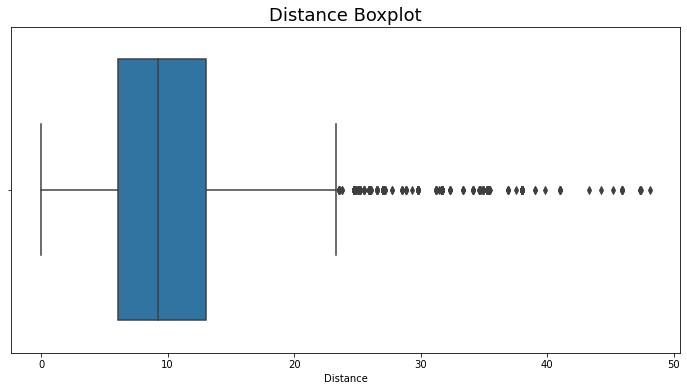

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot('Distance', data=df)
plt.title('Distance Boxplot', fontsize=18)
plt.show()

Dari boxplot diatas terlihat outlier berada setelah batas whisker atas. Jumlah outlier mungkin tidak sama dengan titik karena ada angka yang selisihnya kecil sehingga titiknya overlapping 1 dengan yang lain. Terlihat bahwa garis median condong lebih ke kiri sehingga bisa dibilang terjadi positive skewness

# NOMOR 3

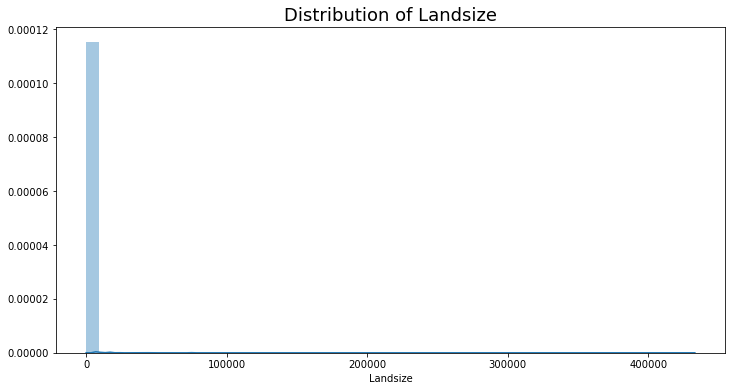

In [11]:
plt.figure(figsize=(12,6))
sns.distplot(df['Landsize'])
plt.title('Distribution of Landsize', fontsize=18)
plt.show()

Dari distribution plot diatas terlihat bahwa data Landsize berfokus di sebelah kiri sehingga tidak terdistribusi secara normal. Kurva KDE pun juga tidak terlihat disini. Bisa dilihat bahwa outlier banyak terdapat disebalah kanan juga, sesuai dengan boxplot yang divisualisasikan

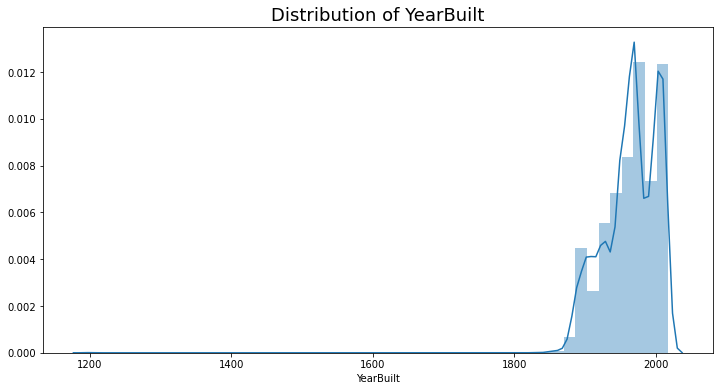

In [12]:
plt.figure(figsize=(12,6))
sns.distplot(df['YearBuilt'])
plt.title('Distribution of YearBuilt', fontsize=18)
plt.show()

Dari distribution plot ini, bisa dilihat bahwa kurva KDE condong ke kanan sehingga bisa dibilang datanya negative skewed dan seharusnya outlier lebih banyak disebelah kiri atau batas bawah dari boxplot.

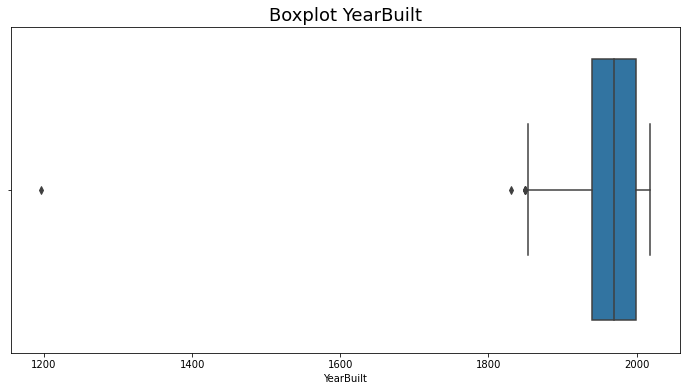

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x='YearBuilt', data=df)
plt.title('Boxplot YearBuilt', fontsize=18)
plt.show()

Dari boxplot diatas terbukti bahwa memang outlier justru banyak dibatas bawah atau sebelah kiri dari boxplot yang ditampilkan. Dari garis median sudah berada di tengah namun harus dicek lebih lanjut dengan normaltest, skewtest, dan kurtosistest apakah dia terdistribusi normal atau tidak

# NOMOR 4

In [20]:
df_year = df.groupby('YearBuilt').mean()[['Price']].reset_index(level=0)
df_year

,YearBuilt,Price
0,1196.0,1.200000e+06
1,1830.0,8.550000e+05
2,1850.0,1.179500e+06
3,1854.0,3.310000e+06
4,1856.0,2.260000e+06
...,...,...
139,2014.0,9.219150e+05
140,2015.0,1.231485e+06
141,2016.0,1.523655e+06
142,2017.0,1.037972e+06


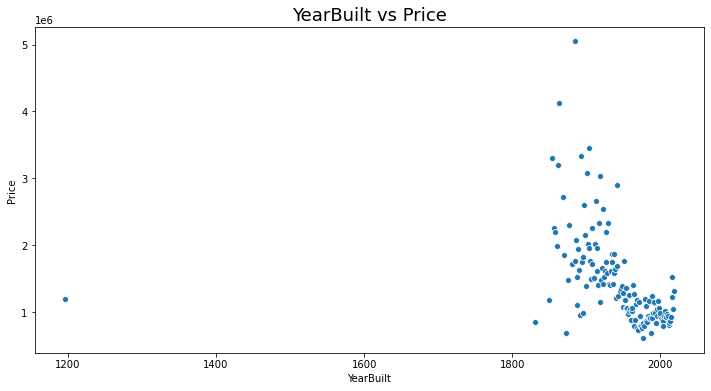

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='YearBuilt', y='Price', data=df_year)
plt.title('YearBuilt vs Price', fontsize=18)
plt.show()

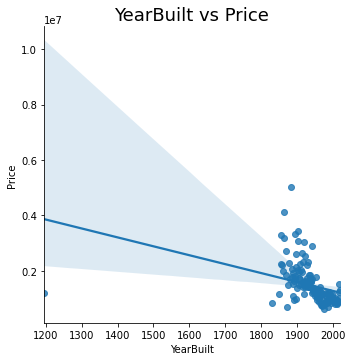

In [29]:
sns.lmplot(x='YearBuilt', y='Price', data=df_year)
plt.title('YearBuilt vs Price', fontsize=18)
plt.show()

Dari visualisasi diatas dapat dilihat bahwa harga rata-rata rumah setiap tahunnya cenderung mengalami penurunan namun ini berkebalikan dengan fakta yang ada di dunia ini, bahwa harga rumah seharusnya semakin meningkat karena populasi orang di dunia yang terus bertambah sedangkan luas tanah di bumi ini tidak berubah. Perlu analisis lebih lanjut sebelum mengambil kesimpulan ini. Namun apabila dipaksa berarti sebaiknya membeli rumah nanti saja karena harganya akan semakin menurun

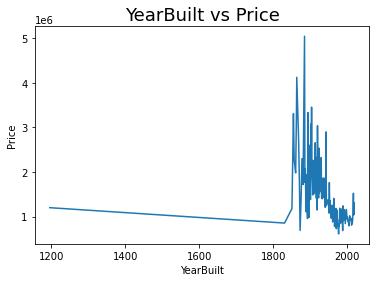

In [30]:
sns.lineplot(x='YearBuilt', y='Price', data=df_year)
plt.title('YearBuilt vs Price', fontsize=18)
plt.show()

Dari plot diatas juga dapat dilihat bahwa harga rumah banyak berkumpul di tahun 1800-2000 dengan nilai yang sangat fluktuatif sehingga perlu analisa lebih lanjut sebelum mengambil kesimpulan

# NOMOR 5

In [40]:
df_corr = df[['Price', 'Landsize', 'Distance', 'Rooms']]

In [41]:
# Distribution

# Normal Test
alpha = 1e-3
kolom = ['Landsize', 'Distance', 'Price', 'Rooms']
for i in kolom:
    n, p = stats.normaltest(df[i])
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(f'kolom {i} tidak terdistribusi normal')
    else:
        print(f'kolom {i} terdistribusi normal')

print('\n')

# Skewness Test
for i in kolom:
    n, p = stats.skewtest(df[i])
    if -0.5 < n < 0.5:
        print(f'the distribution of {i} is approximately symmetric')
    elif -1 < n < -0.5 or 0.5 > n > 1:
        print(f'the distribution of {i} is moderately skewed.')
    elif n < -1 or n > 1:
        print(f'the distribution of {i} is highly skewed.')

print('\n')

# Kurtosis Test
for i in kolom:
    n, p = stats.kurtosistest(df[i])
    if n > 3:
        print(f'kurva distribusi {i} adalah leptokurtik')
    elif n < 3:
        print(f'kurva distribusi {i} adalah platikurtik')
    elif n == 3:
        print(f'kurva distribusi {i} bermakna normal atau mesokurtik atau mesokurtotik')

print('\n', 'SEMUA KOLOM INI TIDAK TERDISTRIBUSI NORMAL')

kolom Landsize tidak terdistribusi normal
kolom Distance tidak terdistribusi normal
kolom Price tidak terdistribusi normal
kolom Rooms tidak terdistribusi normal


the distribution of Landsize is highly skewed.
the distribution of Distance is highly skewed.
the distribution of Price is highly skewed.
the distribution of Rooms is highly skewed.


kurva distribusi Landsize adalah leptokurtik
kurva distribusi Distance adalah leptokurtik
kurva distribusi Price adalah leptokurtik
kurva distribusi Rooms adalah leptokurtik

 SEMUA KOLOM INI TIDAK TERDISTRIBUSI NORMAL


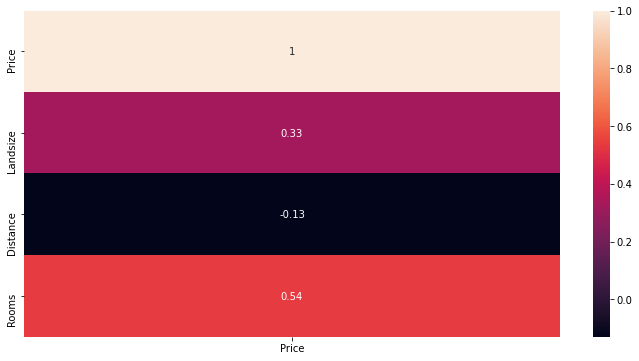

In [42]:
plt.figure(figsize=(12,6))
sns.heatmap(df_corr.corr('spearman')[['Price']], annot=True)
plt.show()

## INSIGHT :

Disini saya menggunakan korelasi dengan metode 'spearman' karena semua data pada kolom tersebut tidak terdistribusi normal dan jumlah datanya menurut saya cukup banyak sehingga saya tidak menggunakan 'kendall'. Dilihat dari nilai korelasinya semakin besar maka semakin berkorelasi, baik itu berbanding lurus(positive) atau berbanding terbalik(negative). Nilai korelasi memiliki range antara -1 dan 1, semakin mendekati 1 atau -1 berarti semakin berkorelasi sedangkan semakin mendekati 0 berarti semakin tidak berkorelasi.

Menurut https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4, nilai yang dianggap memiliki strong correlation antara 0.5-0.7, saya menggunakan angka ini menjadi suatu acuan untuk menentukan kualitasi korelasi dari data ini. 

Kolom 'Landsize' memiliki nilai korelasi 0.33 jadi saya kategorikan sebagai weak-correlation dimana korelasinya lemah dan berbanding lurus, artinya semakin luas 'Landsize' maka seharusnya harga(Price) semakin tinggi karena nilai korelasinya positif namun korelasinya lemah.

Kolom 'Distance' memiliki nilai korelasi -0.13 artinya angka ini lebih dekat ke-0 sehingga saya kategorikan tidak memiliki korelasi. Artinya kolom 'Distance' hampir tidak punya korelasi dalam penentuan harga(Price) rumah. Kalaupun dianggap ada maka berbanding terbalik artinya semakin jauh 'Distance'-nya semakin kecil harga(Price) rumahnya karena nilainya negatif. Fenomena ini mungkin saja terjadi karena jarak rumah ke C.B.D (Central Business District) ternyata tidak berpengaruh karena kemajuan teknologi sehingga kebanyakan pegawai di negara atau daerah tersebut melakukan work-from-home. Namun ini baru salah satu kemungkinan dari sekian banyak kemungkinan yang ada, sehingga perlu dianalisis lebih lanjut

Kolom 'Room' memiliki nilai korelasi sebesar 0.54 artinya disini kolom ini memiliki strong-correlation dengan harga(Price) rumah. Karena nilainya positif berarti semakin banyak jumlah_kamar(Room) berarti semakin mahal harga(Price) rumahnya (berbanding lurus).

Diantara semua feature/column ini yang paling memiliki korelasi adalah kolom 'Room' sehingga kolom ini memiliki pengaruh yang sangat besar dalam menentukan harga(Price) rumah.

## SARAN :

Untuk developer rumah lebih baik mempertimbangkan jumlah_kamar(Room) daripada ukuran_tanah(Landsize) apalagi jarak(Distance) dalam membangun rumah karena feature ini yang paling mempengaruhi harga jual suatu rumah pada dataset ini. Tentunya hal ini juga harus disesuaikan dengan daya beli masyarakat sehingga harga yang ditentukan lebih optimal. Perlu diingat bahwa yang maksimal belum tentu optimal.


